In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
df=pd.read_json(r"C:\Users\ptlon\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


<AxesSubplot:>

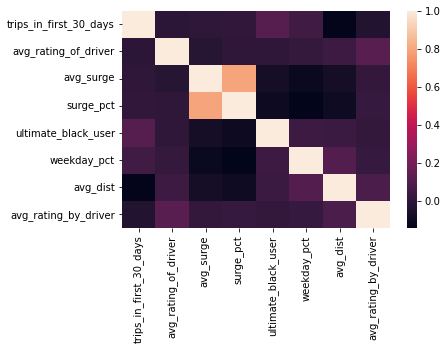

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
ultimate_class=df[['avg_rating_by_driver',"avg_rating_of_driver",'weekday_pct','surge_pct',
"trips_in_first_30_days","ultimate_black_user"]]

In [8]:
ultimate_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_rating_by_driver    49799 non-null  float64
 1   avg_rating_of_driver    41878 non-null  float64
 2   weekday_pct             50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   trips_in_first_30_days  50000 non-null  int64  
 5   ultimate_black_user     50000 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 2.0 MB


In [9]:
ultimate_class.dropna(inplace=True)

In [10]:
ultimate_class.dtypes

avg_rating_by_driver      float64
avg_rating_of_driver      float64
weekday_pct               float64
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
dtype: object

categorical-encoding for columns 
ultimate_class_encoded=pd.get_dummies(ultimate_class, columns=["phone"])

In [11]:
ultimate_class_encoded =ultimate_class

cleanup_nums = {"ultimate_black_user":{False: 1, True: 0 }}

ultimate_class_encoded = ultimate_class_encoded.replace(cleanup_nums)

ultimate_class_encoded.head()

,avg_rating_by_driver,avg_rating_of_driver,weekday_pct,surge_pct,trips_in_first_30_days,ultimate_black_user
0,5.0,4.7,46.2,15.4,4,0
1,5.0,5.0,50.0,0.0,0,1
2,5.0,4.3,100.0,0.0,3,1
3,4.9,4.6,80.0,20.0,9,0
4,4.9,4.4,82.4,11.8,14,1


In [12]:
ultimate_class_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_rating_by_driver    41744 non-null  float64
 1   avg_rating_of_driver    41744 non-null  float64
 2   weekday_pct             41744 non-null  float64
 3   surge_pct               41744 non-null  float64
 4   trips_in_first_30_days  41744 non-null  int64  
 5   ultimate_black_user     41744 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 2.2 MB


In [13]:
y=ultimate_class_encoded.ultimate_black_user.values

In [14]:
len(ultimate_class_encoded),len(y)

(41744, 41744)

In [15]:
X=ultimate_class_encoded.drop('ultimate_black_user',axis=1).values

In [16]:
X.shape,y.shape

((41744, 5), (41744,))

In [17]:
clf1=AdaBoostClassifier()

In [18]:
clf=RandomForestClassifier(n_estimators=1000,
    criterion='gini',
    min_samples_split=4,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.3,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)

In [19]:
clf1.fit(X,y)

AdaBoostClassifier()

In [20]:
clf1.feature_importances_

array([0.24, 0.08, 0.12, 0.34, 0.22])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((33395, 5), (8349, 5), (33395,), (8349,))

In [23]:
clf1.fit(X_train,y_train)

AdaBoostClassifier()

In [24]:
y_pred=clf1.predict(X_test)

In [25]:
clf1.score(X_test,y_test)

0.6146843933405198

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.6146843933405198

In [27]:
confusion_matrix(y_test, y_pred)

array([[ 398, 2880],
       [ 337, 4734]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.12      0.20      3278
           1       0.62      0.93      0.75      5071

    accuracy                           0.61      8349
   macro avg       0.58      0.53      0.47      8349
weighted avg       0.59      0.61      0.53      8349

